Downloading Dataset

In [1]:
pip install opendatasets


In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/div456/indian-fabrics-3-classes")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: div456
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/div456/indian-fabrics-3-classes


100%|██████████| 88.4M/88.4M [00:00<00:00, 160MB/s]


Importing Libraries


In [1]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization


Creating Train, Valid, Test Datasets


In [2]:
import pathlib

data_dir = pathlib.Path('/content/indian-fabrics-3-classes/train')

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  seed=123,
  image_size=(320, 320),
  batch_size=64,
  color_mode='rgb',
  labels='inferred',
  label_mode='int'
  )


Found 1068 files belonging to 3 classes.


In [4]:
data_dir = pathlib.Path('/content/indian-fabrics-3-classes/train')
valid_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  seed=123,
  image_size=(320, 320),
  batch_size=64,
  color_mode='rgb',
  labels='inferred',
  label_mode='int'
  )


Found 1068 files belonging to 3 classes.


In [5]:
data_dir = pathlib.Path('/content/indian-fabrics-3-classes/test')
test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  seed=123,
  image_size=(320, 320),
  batch_size=64,
  color_mode='rgb',
  labels='inferred',
  label_mode='int'
  )


Found 49 files belonging to 3 classes.


In [6]:
batch_size = 64
img_height = 320
img_width = 320


Create & Train the model

In [7]:
model = Sequential()

In [8]:
model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))

In [ ]:
# model.add(layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)))
# model.add(layers.RandomRotation(0.1, fill_mode='nearest'))
# model.add(layers.RandomZoom(0.1))
# model.add(layers.RandomContrast(0.1))
# model.add(layers.RandomBrightness(0.04))

In [9]:

# model.add(Conv2D(64, 3, padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D())

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())

# model.add(Conv2D(128, 3, padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D())

model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))


In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'],
              run_eagerly=True
               )


In [11]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 320, 320, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 320, 320, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 160, 160, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 160, 160, 16)      4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 80, 80, 16)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 102400)            0

In [12]:
type(model)

keras.src.engine.sequential.Sequential

In [13]:
h = model.fit(
  train_ds,
  validation_data=valid_ds,
  epochs=8,
  batch_size= 32
)


Epoch 1/8


17/17 [==============================] - 21s 712ms/step - loss: 1.2476 - accuracy: 0.4382 - val_loss: 1.0372 - val_accuracy: 0.6507
Epoch 2/8
17/17 [==============================] - 11s 533ms/step - loss: 0.8984 - accuracy: 0.6301 - val_loss: 0.6542 - val_accuracy: 0.8109
Epoch 3/8
17/17 [==============================] - 12s 566ms/step - loss: 0.5245 - accuracy: 0.8127 - val_loss: 0.2207 - val_accuracy: 0.9700
Epoch 4/8
17/17 [==============================] - 11s 584ms/step - loss: 0.2294 - accuracy: 0.9373 - val_loss: 0.0915 - val_accuracy: 0.9888
Epoch 5/8
17/17 [==============================] - 12s 646ms/step - loss: 0.1118 - accuracy: 0.9710 - val_loss: 0.0429 - val_accuracy: 0.9972
Epoch 6/8
17/17 [==============================] - 12s 664ms/step - loss: 0.0339 - accuracy: 0.9991 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 7/8
17/17 [==============================] - 17s 940ms/step - loss: 0.0209 - accuracy: 0.9963 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 8/8
17/17 

In [ ]:
h.history

In [15]:
model.save('/content/Pattern_model.h5')
model.save('/content/Pattern_model.keras')



Text(0.5, 1.0, 'Accuracy vs Epochs')

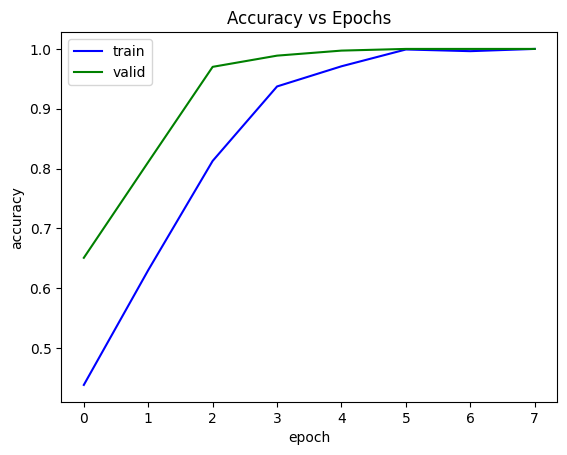

In [16]:
import matplotlib.pyplot as mp

mp.plot(h.history['accuracy'], color='blue')
mp.plot(h.history['val_accuracy'], color='green')
mp.xlabel('epoch')
mp.ylabel('accuracy')
mp.legend(['train', 'valid'])
mp.title('Accuracy vs Epochs')

Text(0.5, 1.0, 'Loss vs Epochs')

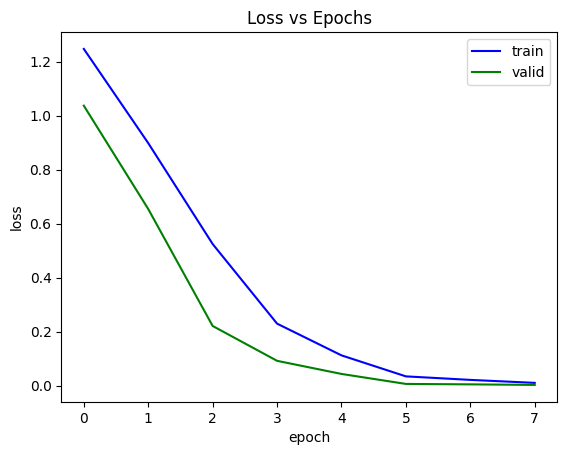

In [17]:
import matplotlib.pyplot as mp

mp.plot(h.history['loss'], color='blue')
mp.plot(h.history['val_loss'], color='green')
mp.xlabel('epoch')
mp.ylabel('loss')
mp.legend(['train', 'valid'])
mp.title('Loss vs Epochs')

Test the Model

In [18]:
loss, accuracy = model.evaluate(test_ds)
print(f'Test Accuracy: {accuracy:.2f}')
print(f'Test Loss: {loss:.2f}')


1/1 [==============================] - 1s 1s/step - loss: 0.9877 - accuracy: 0.7755
Test Accuracy: 0.78
Test Loss: 0.99


In [19]:
import numpy as np

In [20]:
for images, labels in test_ds:
    predictions = model.predict(images)
    for i in range(len(images)):
        image_path = test_ds.file_paths[i]  # Assuming test_ds contains file paths
        index_pred = np.argmax(predictions[i])
        class_names = ['Banarasi', 'Ikat', 'Pichwai']
        predicted_class = class_names[index_pred]
        print("Image Path:", image_path)
        print("Predicted class:", predicted_class)


2/2 [==============================] - 1s 378ms/step
Image Path: /content/indian-fabrics-3-classes/test/Banarasi/images13_jpg.rf.f2a3b1720972de4bb75b7fcb062269c8.jpg
Predicted class: Banarasi
Image Path: /content/indian-fabrics-3-classes/test/Banarasi/images33_jpg.rf.b224fd1647ca405f955e199d2b136f2b.jpg
Predicted class: Pichwai
Image Path: /content/indian-fabrics-3-classes/test/Ikat/images33_jpg.rf.9e6ae9d131373c18cdbe6273089867f6.jpg
Predicted class: Pichwai
Image Path: /content/indian-fabrics-3-classes/test/Pichwai/pastel-hand-painted-pure-moonga-silk-pichwai-blouse-fabric-1-mtr-714991_jpg.rf.11185ddc8f105f1a385559cb725f5cc7.jpg
Predicted class: Pichwai
Image Path: /content/indian-fabrics-3-classes/test/Banarasi/red-traditonal-banarasi-silk-brocade-fabric-2018415488-kfz42azv_jpg.rf.db3ab1c289bebaecbcff8767f5644a8c.jpg
Predicted class: Ikat
Image Path: /content/indian-fabrics-3-classes/test/Banarasi/FKACJRD10028_2_1200x_jpg.rf.b6a9cf3e00dfa401ad208adce5ffac55.jpg
Predicted class: Bana

In [21]:
from tensorflow.keras.preprocessing import image


In [25]:
img = image.load_img('/content/ikat.png', target_size=(320, 320))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
print(img_array.shape)
img_array /= 255.0
a= model.predict(img_array)
pred_class_ind = np.argmax(a)
print(a)
print(class_names[pred_class_ind])



(1, 320, 320, 3)
1/1 [==============================] - 0s 23ms/step
[[0.00287029 0.98840404 0.00872567]]
Ikat


In [26]:
class_names = test_ds.class_names
print("Class Names:", class_names)


Class Names: ['Banarasi', 'Ikat', 'Pichwai']


Using ResNet


In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

data_dir = '/content/indian-fabrics-3-classes'

img_height, img_width = 224, 224
batch_size = 32

train_ds = image_dataset_from_directory(
    directory=f"{data_dir}/train",
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

valid_ds = image_dataset_from_directory(
    directory=f"{data_dir}/valid",
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_ds = image_dataset_from_directory(
    directory=f"{data_dir}/test",
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
valid_ds = valid_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

base_model = ResNet50(include_top=False, input_shape=(img_height, img_width, 3), weights='imagenet')

base_model.trainable = False
# for layer in base_model.layers[:40]:  # Example: keep the first 100 layers frozen
#     layer.trainable = False
# for layer in base_model.layers[40:]:
#     layer.trainable = True

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.003),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=15,
    callbacks=[early_stopping]
)

loss, accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {accuracy:.2f}")

model.save('/content/fabric_classifier_resnet50.h5')


Found 1068 files belonging to 3 classes.
Found 71 files belonging to 3 classes.
Found 49 files belonging to 3 classes.
Epoch 1/15
34/34 [==============================] - 9s 147ms/step - loss: 1.1930 - accuracy: 0.3699 - val_loss: 1.0666 - val_accuracy: 0.4930
Epoch 2/15
34/34 [==============================] - 5s 135ms/step - loss: 1.0720 - accuracy: 0.4129 - val_loss: 1.0552 - val_accuracy: 0.5070
Epoch 3/15
34/34 [==============================] - 4s 114ms/step - loss: 1.0548 - accuracy: 0.4354 - val_loss: 1.0281 - val_accuracy: 0.5211
Epoch 4/15
34/34 [==============================] - 4s 102ms/step - loss: 1.0519 - accuracy: 0.4401 - val_loss: 1.0432 - val_accuracy: 0.4930
Epoch 5/15
34/34 [==============================] - 4s 112ms/step - loss: 1.0481 - accuracy: 0.4326 - val_loss: 1.0475 - val_accuracy: 0.5070
Epoch 6/15
2/2 [==============================] - 0s 62ms/step - loss: 1.0694 - accuracy: 0.4082
Test Accuracy: 0.41


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
